In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Lab6.utils.bubble import BubbleChart

#### Zadanie 1
Przygotuj i wyświetl wykres liniowy funkcji f(x) = 1/x dla x ϵ [1, 20]. Dodaj etykietę do linii wykresu i wyświetl legendę. Dodaj odpowiednie etykiety do osi wykresu (‘x’, ’f(x)’) oraz ustaw zakres osi na (0, 1) oraz (1, długość wektora x).

Text(0.5, 1.0, 'Wykres funkcji f(x): 1/x')

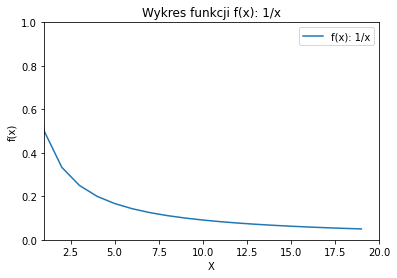

In [4]:
values = [1 / x for x in range(1, 21)]
plt.plot(values, label='f(x): 1/x')
plt.legend()
plt.ylim([0, 1])
plt.xlim([1, len(values)])
plt.xlabel("X")
plt.ylabel("f(x)")
plt.title("Wykres funkcji f(x): 1/x")

#### Zadanie 2
Korzystając ze zbioru danych zamowienia.csv przygotuj i wyświetl dane w postaci wykresu liniowego z sumą zamówień dla każdego sprzedawcy z Polski w roku 2004 grupując po miesiącach. Każdy wykres to linia dla danego sprzedawcy.

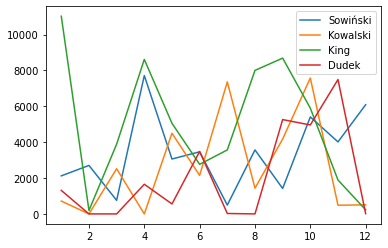

In [5]:
import pandas as pd
import datetime as dt
df_zamowienia = pd.read_csv('../data/zamowienia.csv', sep=';')
df_zamowienia['Data zamowienia'] = pd.to_datetime(df_zamowienia['Data zamowienia'])
df_zamowienia_polska = df_zamowienia[df_zamowienia['Kraj'] == "Polska"]
df_zamowienia_polska_2004 = df_zamowienia_polska[df_zamowienia_polska['Data zamowienia'].dt.year == int(2004)]

dataframes = []
for sprzedawca in df_zamowienia_polska_2004['Sprzedawca'].unique():
    temp = df_zamowienia_polska_2004[df_zamowienia_polska_2004['Sprzedawca'] == sprzedawca].resample('M', on='Data zamowienia')['Utarg'].sum()
    dataframes.append(temp)

plot_dataframe = pd.concat(dataframes, axis=1)
plot_dataframe.columns = ['Sowiński', 'Kowalski', 'King', 'Dudek']
plot_dataframe.index = plot_dataframe.index.month

plt.plot(list(plot_dataframe.index), plot_dataframe['Sowiński'].values, label="Sowiński")
plt.plot(list(plot_dataframe.index), plot_dataframe['Kowalski'].values, label="Kowalski")
plt.plot(list(plot_dataframe.index), plot_dataframe['King'].values, label="King")
plt.plot(list(plot_dataframe.index), plot_dataframe['Dudek'].values, label="Dudek")

plt.legend()

#### Zadanie 3
Korzystając z biblioteki pandas wczytaj zbiór danych z narodzinami dzieci przygotuj poniższe wykresy:
* wykres słupkowy przedstawiający ilość narodzonych dziewczynek i chłopców w całym okresie.
* wykres liniowy, gdzie będą dwie linie, jedna dla ilości urodzonych kobiet, druga dla mężczyzn dla każdego roku z osobna. Czyli y to ilość narodzonych kobiet lub mężczyzn (dwie linie), x to rok.
* wykres słupkowy przedstawiający sumę urodzonych dzieci w każdym roku.
Dodaj do wykresów stosowne etykiety. Poustawiaj różne kolory dla wykresów.

<AxesSubplot:title={'center':'Suma imion w podziale na płeć'}, xlabel='Plec', ylabel='Suma imion'>

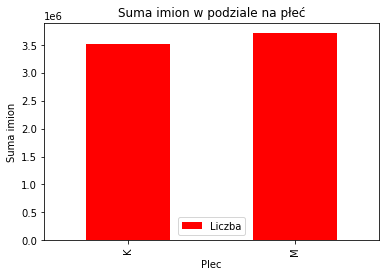

In [6]:
df_imiona = pd.read_excel('../data/imiona.xlsx')

df_imiona[["Plec", "Liczba"]].groupby('Plec').sum().plot(kind="bar", title='Suma imion w podziale na płeć', color=['red'], ylabel='Suma imion')

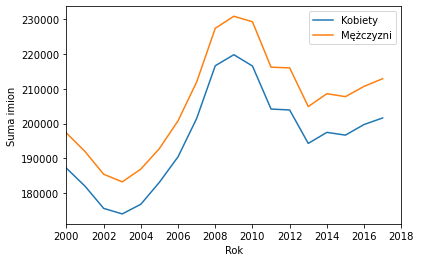

In [7]:
podzial_na_lata = df_imiona[['Rok', 'Liczba', 'Plec']].groupby(["Rok", 'Plec'])['Liczba'].sum()
podzial_na_lata = podzial_na_lata.reset_index()

plt.plot(podzial_na_lata[podzial_na_lata['Plec'] == "K"]["Rok"], podzial_na_lata[podzial_na_lata['Plec'] == "K"]["Liczba"], label="Kobiety")
plt.plot(podzial_na_lata[podzial_na_lata['Plec'] == "M"]["Rok"], podzial_na_lata[podzial_na_lata['Plec'] == "M"]["Liczba"], label="Mężczyzni")
plt.xlim([2000, 2018])
plt.xlabel("Rok")
plt.ylabel("Suma imion")
plt.legend()
plt.show()

[Text(0, 0, '384405'),
 Text(0, 0, '373922'),
 Text(0, 0, '361005'),
 Text(0, 0, '357210'),
 Text(0, 0, '363682'),
 Text(0, 0, '375932'),
 Text(0, 0, '391233'),
 Text(0, 0, '413394'),
 Text(0, 0, '444040'),
 Text(0, 0, '450692'),
 Text(0, 0, '445855'),
 Text(0, 0, '420395'),
 Text(0, 0, '419929'),
 Text(0, 0, '399180'),
 Text(0, 0, '406041'),
 Text(0, 0, '404418'),
 Text(0, 0, '410423'),
 Text(0, 0, '414526')]

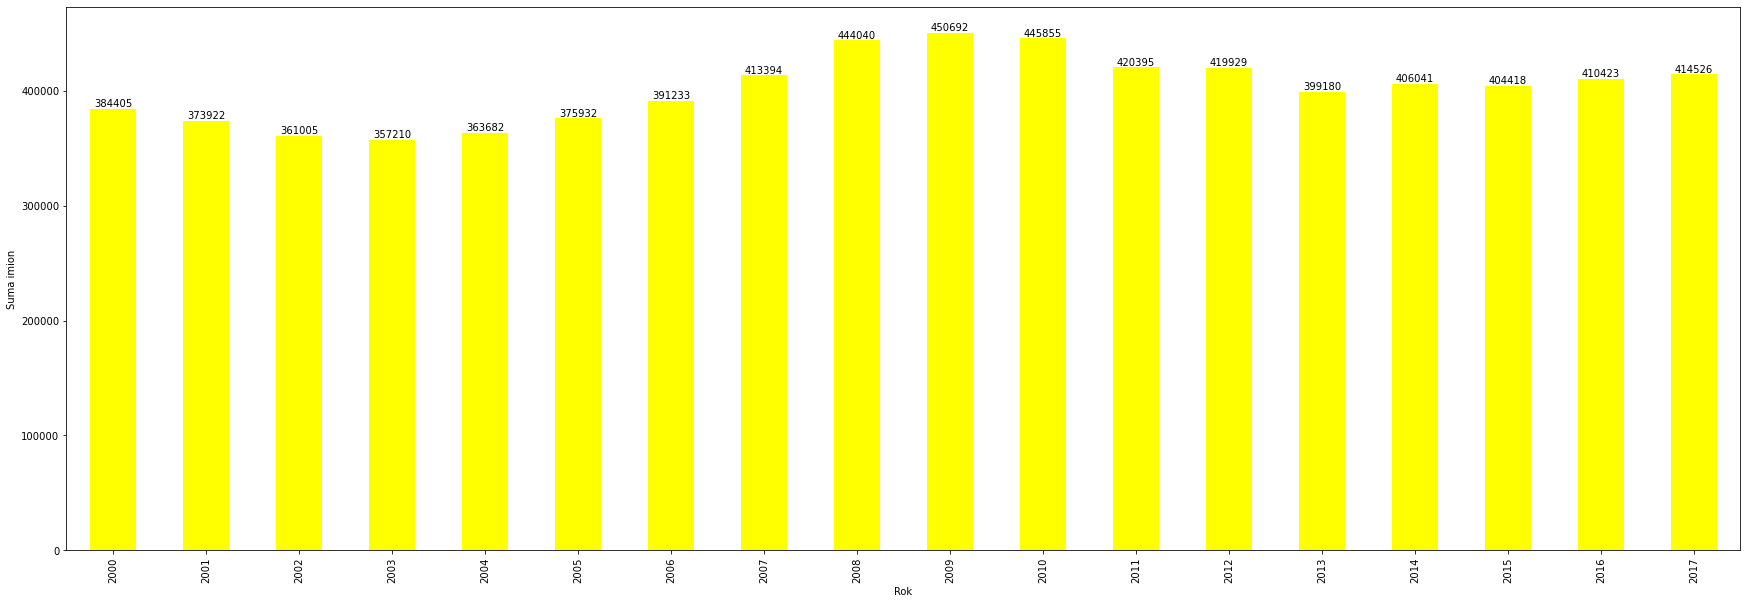

In [8]:
podzial = df_imiona[['Rok', 'Liczba']].groupby(["Rok"])['Liczba'].sum()
ax = podzial.plot(kind='bar', color='yellow', ylabel='Suma imion', figsize=(30, 10))
ax.bar_label(ax.containers[0])

#### Zadanie 4
Korzystając ze zbioru danych Iris (https://archive.ics.uci.edu/ml/datasets/iris) wygeneruj wykres punktowy, gdzie wektor x to wartość ‘sepal length’ a y to ‘sepal width’, dodaj paletę kolorów c na przykładzie listingu 6 a parametr s niech będzie wartością absolutną z różnicy wartości poszczególnych elementów wektorów x oraz y. Wykorzystaj bibliotekę pandas do przechowania datasetu.

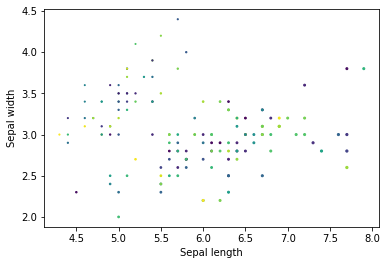

In [9]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris = iris['frame']
x, y, c = iris['sepal length (cm)'], iris['sepal width (cm)'], np.random.randint(0, 150, 150)
s = list(np.array(x) - np.array(y))
s = [abs(x) for x in s]
plt.scatter(x, y, c=c, s=s)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

#### Zadanie 5
Korzystając z pliku zamowienia.csv, policz sumy zamówień dla każdego sprzedawcy i wyświetl wykres kołowy z procentowym udziałem każdego sprzedawcy w ogólnej sumie zamówień. Poszukaj w Internecie jak dodać cień do takiego wykresu i jak działa atrybut explode tego wykresu. Wyświetl wykres podstawowy, z cieniem oraz z jednym elementem z atrybutem explode.

<Figure size 1440x720 with 0 Axes>

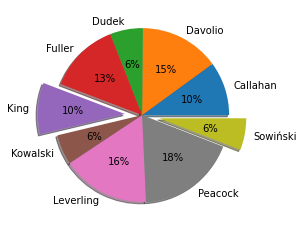

In [10]:
sprzedawcy_utarg = df_zamowienia[['Sprzedawca', 'Utarg']].groupby('Sprzedawca').sum("Utarg")
suma_utargu = df_zamowienia['Utarg'].sum()

plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
ax.pie(list(sprzedawcy_utarg.values.flatten()), labels=list(sprzedawcy_utarg.index), autopct='%.0f%%', explode=[0, 0, 0, 0, 0.2, 0, 0, 0, 0.2], shadow=True)
plt.show()

#### Zadanie 6
Korzystając z galerii matplotlib i przykładu postaraj się umieścić analogicznie 10 najbardziej ludnych krajów na świecie w roku 2017 korzystając z danych w pliku ludność.

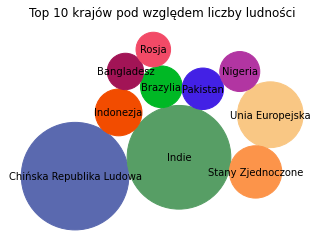

In [11]:
ludnosc = pd.read_excel('../data/ludnosc.xlsx')
top = ludnosc[['Kraj', 2017]].sort_values(by=2017, ascending=False)[:10]
colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825', '#4321E5', '#B235A2', '#A21456', '#F24A67']
bubble_chart = BubbleChart(area=top[2017], bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'))
bubble_chart.plot(ax, top['Kraj'], colors=colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Top 10 krajów pod względem liczby ludności')
plt.show()